In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

import lightgbm as lgb
from lightgbm import LGBMClassifier

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("data/data_cleaned_raw.csv")
df["genre"] = df["genre"].astype("category").cat.codes
df['time'] = pd.to_numeric(df['time'])

# Engineering and Aggregation

In [4]:
from src.engineering import *
result_df = aggregate_data(
    df, divide_by=2,
    agg_funcs = ['max', 'min', 'std', 'mean', 'median', count_above_threshold_1])

df = result_df.copy()

# Modelling

In [5]:
from src.testing import *
average_accuracy, avg_conf_mat = loocv_testing(df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2621
[LightGBM] [Info] Number of data points in the train set: 144, number of used features: 54
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

In [6]:
print(f'Average Accuracy: {average_accuracy:.4f}')

Average Accuracy: 0.6845


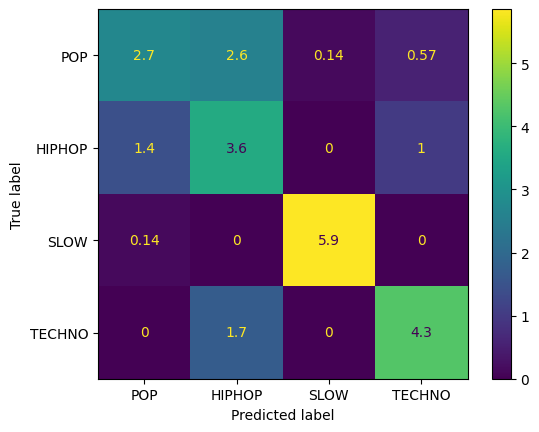

In [7]:
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_mat,
                              display_labels=['POP','HIPHOP','SLOW','TECHNO'])
disp.plot()
plt.show()

In [ ]:
def map_name_to_good_dancer(name):
    if name in ["arda", "sietske", "luna"]:
        return 1
    else:
        return 0

# Assuming df is your DataFrame
df['good_dancer'] = df['subject_name'].apply(lambda x: map_name_to_good_dancer(x))

def map_name_to_gender(name):
    if name in ["arda", "uzun_boylu_cinli_eleman", "uzun_siyah_sacli_eleman"]:
        return 1
    else:
        return 0

# Assuming df is your DataFrame
df['gender'] = df['subject_name'].apply(lambda x: map_name_to_gender(x))

NameError: name 'df' is not defined

In [ ]:
drop_columns = ['subject_id', 'label', 'genre_first']
X = df.drop(drop_columns, axis=1)
y = df["genre_first"]

loo = LeaveOneOut()

for train_index, val_index in loo.split(X):
    print()
    print(train_index, val_index)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167] [0]
[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78 

## Classification

In [ ]:
# Initialize the LGBMClassifier
model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=50,
    learning_rate=0.05,
    n_estimators=100)

# Fit the model
model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

# Make predictions on the test set
y_pred = model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 48, number of used features: 54
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.2f}')

Test accuracy: 0.88


In [ ]:
# lgb.plot_importance(model, importance_type="gain", figsize=(10, 80), title="LightGBM Feature Importance (Gain)")

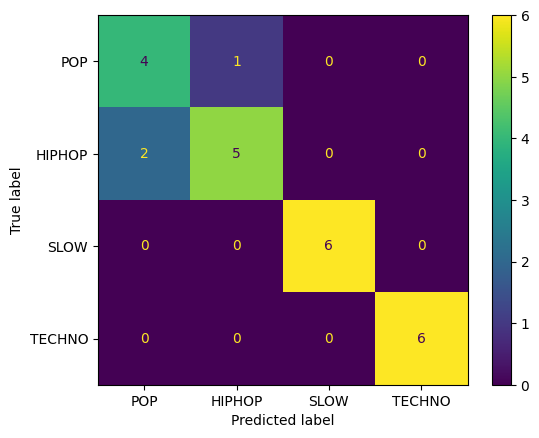

In [ ]:
conf_mat = confusion_matrix(y_pred, y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                              display_labels=['POP','HIPHOP','SLOW','TECHNO'])
disp.plot()
plt.show()